In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree 
import numpy as np
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
import time
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
!pip install pydotplus
import pydotplus
from IPython.display import Image  
import itertools


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /opt/anaconda3/lib/python3.7/site-packages (0.6.1)


In [139]:
conda install -c conda-forge imbalanced-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.8.0                |           py37_0         3.0 MB  conda-forge
    imbalanced-learn-0.5.0     |             py_0          98 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.5.0-py_0

The following packages will be UPDATED:

  c

In [65]:
df = pd.read_csv('final_df.csv', index_col=0)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 0 to 309
Data columns (total 12 columns):
ISBN                1279 non-null object
author              1279 non-null object
author_followers    1279 non-null float64
genre               1279 non-null object
pages               1279 non-null float64
publish_date        1279 non-null object
publisher           1279 non-null object
rating              1279 non-null float64
series              1279 non-null int64
title               1279 non-null object
NYT_Bestseller      1279 non-null int64
celeb_bookclub      1279 non-null int64
dtypes: float64(3), int64(3), object(6)
memory usage: 129.9+ KB


In [67]:
dummy_vars = ['series', 'publisher', 'genre', 'celeb_bookclub']
cont_vars = ['rating', 'author_followers', 'pages']

In [68]:
dummies = df[dummy_vars].astype('str')
cont = df[cont_vars]
X = pd.get_dummies(pd.concat([dummies, cont], axis = 1), drop_first = True)

In [69]:
Y = df['NYT_Bestseller']

In [70]:
X.head()

,rating,author_followers,pages,series_1,publisher_Broadway Books,publisher_Clarkson Potter Publishers,publisher_Copper Canyon Press,publisher_CreateSpace Independent Publishing Platform,"publisher_Farrar, Straus and Giroux",publisher_First Second,...,genre_Romance,genre_Science,genre_Short,genre_Sports,genre_Thriller,genre_Travel,genre_Womens,genre_Writing,genre_Young Adult,celeb_bookclub_1
0,4.16,9.333796,544.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.93,8.288786,429.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3.90,9.076123,336.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,3.96,7.752335,344.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.98,7.215975,294.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
col_to_drop = ['genre_Parenting',
'genre_Sports',
'genre_Womens',
'genre_Writing',
'genre_Psychology',
'genre_Politics',
'genre_Travel',
'genre_Leadership',
'genre_Alcohol',
'genre_Animals',
'genre_Music',
'genre_Media',
'genre_Christian',
'genre_Language',
'genre_Humor',
'genre_Holiday',
'genre_Health',
'genre_Business',
'genre_Crime',
'genre_Colouring',
'genre_Cultural']

In [72]:
for col in col_to_drop:
    del X[col]

In [73]:
X.shape

(1279, 43)

In [74]:
# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [133]:
from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.NYT_Bestseller==0]
fraud = X[X.NYT_Bestseller==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.NYT_Bestseller.value_counts()

1    748
0    748
Name: NYT_Bestseller, dtype: int64

In [134]:
y_train = upsampled.NYT_Bestseller
X_train = upsampled.drop('NYT_Bestseller', axis=1)

## SMOTE

In [24]:
conda install -U imbalanced-learn

usage: conda [-h] [-V] command ...
conda: error: unrecognized arguments: -U

Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install imblearn.over_sampling

  ERROR: Could not find a version that satisfies the requirement imblearn.over_sampling (from versions: none)
ERROR: No matching distribution found for imblearn.over_sampling


In [25]:
from imblearn.over_sampling import SMOTE

In [81]:
sm = SMOTE(random_state=10)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print(np.bincount(y_train_res), np.bincount(y_train_res))

[730 730] [730 730]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [82]:
x_train_res.shape

(1460, 43)

In [83]:
y_train_res.shape

(1460,)

# Baseline

In [360]:
df['NYT_Bestseller'].value_counts(normalize=True)

0    0.724003
1    0.275997
Name: NYT_Bestseller, dtype: float64

In [361]:
dum_clf = DummyClassifier(strategy='most_frequent')
dum_clf.fit(X_train,y_train)
y_hat_train = dum_clf.predict(X_train)
y_hat_test = dum_clf.predict(X_test)

In [362]:
print(accuracy_score(y_hat_train,y_train))
print(accuracy_score(y_hat_test,y_test))

0.718475073313783
0.74609375


In [363]:
print_metrics(y_test,y_hat_test)

Precision Score: 0.0
Recall Score: 0.0
Accuracy Score: 0.74609375
F1 Score: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[188   0]
 [ 68   0]]


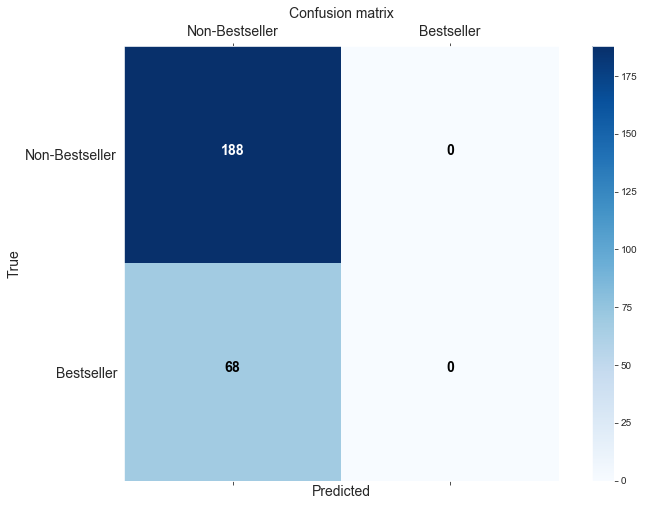

In [180]:

m = confusion_matrix(y_test,y_hat_test)
classes = ['Non-Bestseller','Bestseller']
print(cm)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm,cmap=plt.cm.Blues)
plt.title('Confusion matrix',fontdict={'size':14})
fig.colorbar(cax)
sns.axes_style({'text.color': 'red'})
ax.set_xticklabels([''] + classes,fontdict={'size':14})
ax.set_yticklabels([''] + classes,fontdict={'size':14})
plt.xlabel('Predicted',fontdict={'size':14})
plt.ylabel('True',fontdict={'size':14})
plt.grid(b=None)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             fontdict={'size':14,'weight':'heavy'},
             color="white" if cm[i, j] > thresh else "black")
plt.show()

In [178]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_hat_test)
classes = ['Not_Bestseller', 'Bestseller']

In [179]:
cnf_matrix = confusion_matrix(y_test, y_hat_test)

fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes,normalize=False,
                      title='Confusion matrix')
plt.show()

NameError: name 'y_pred_class' is not defined

<Figure size 432x288 with 0 Axes>

In [84]:

def plot_AUC_ROC(y_score,fpr,tpr):
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    print('AUC: {}'.format(auc(fpr, tpr)))
    plt.figure(figsize=(10,8))
    lw = 2
    plt.plot(fpr, tpr, color='blue',
         lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [85]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

# Logistic Regression

In [133]:
logreg = LogisticRegression()
model_log = logreg.fit(x_train_res, y_train_res)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [134]:
# make class predictions for the testing set
y_hat_test_log = logreg.predict(X_test)
y_hat_train_log = logreg.predict(x_train_res)

In [135]:
#metrics
print_metrics(y_hat_train_log, y_train_res)
print('----------')
print_metrics(y_hat_test_log,y_test)

Precision Score: 0.7835616438356164
Recall Score: 0.7123287671232876
Accuracy Score: 0.7335616438356164
F1 Score: 0.746249184605349
----------
Precision Score: 0.7
Recall Score: 0.3230769230769231
Accuracy Score: 0.5859375
F1 Score: 0.4421052631578948


[[108  88]
 [ 18  42]]


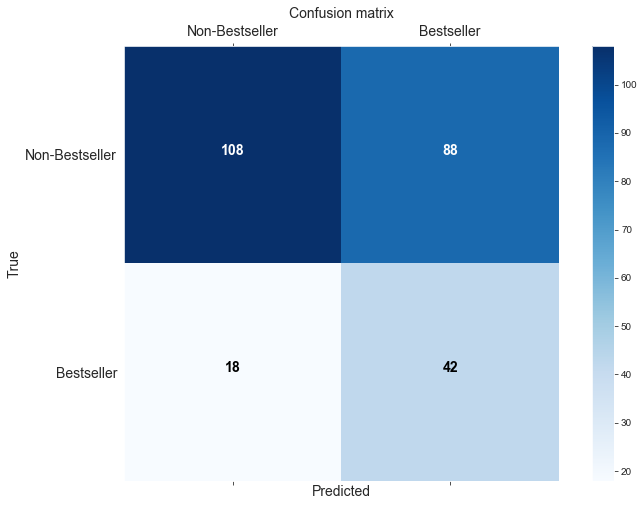

In [89]:
cm = confusion_matrix(y_test,y_hat_test_log)
classes = ['Non-Bestseller','Bestseller']
print(cm)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm,cmap=plt.cm.Blues)
plt.title('Confusion matrix',fontdict={'size':14})
fig.colorbar(cax)
sns.axes_style({'text.color': 'red'})
ax.set_xticklabels([''] + classes,fontdict={'size':14})
ax.set_yticklabels([''] + classes,fontdict={'size':14})
plt.xlabel('Predicted',fontdict={'size':14})
plt.ylabel('True',fontdict={'size':14})
plt.grid(b=None)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             fontdict={'size':14,'weight':'heavy'},
             color="white" if cm[i, j] > thresh else "black")
plt.show()

In [90]:
#ROC/AUC
#First calculate the probability scores of each of the datapoints:
y_test_score = model_log.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_test_score)

y_train_score = model_log.decision_function(X_train)

train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

AUC: 0.6676020408163266


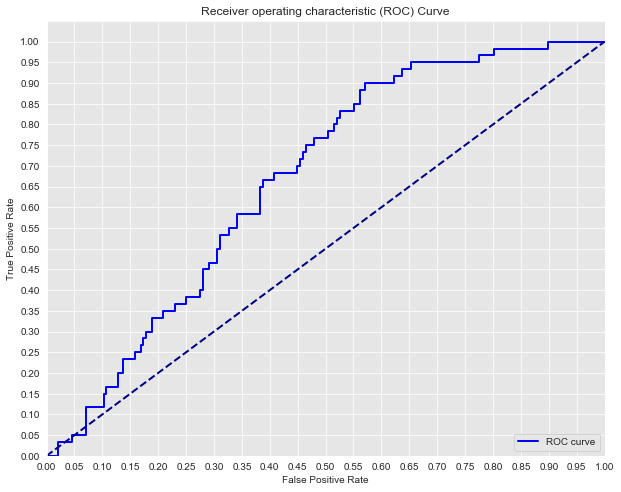

In [91]:
plot_AUC_ROC(y_test_score,fpr,tpr)

In [127]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

clf_2 = GridSearchCV(LogisticRegression(solver='liblinear'), hyperparameters, cv=5, verbose=0)

In [128]:
best_model = clf_2.fit(x_train_res, y_train_res)

In [129]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


In [130]:
# Grid Search
logreg_2 = LogisticRegression(fit_intercept = False, solver='liblinear', C=1, penalty='l1')
model_log = logreg_2.fit(x_train_res, y_train_res)
model_log

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
y_hat_test_2 = best_model.predict(X_test)

In [132]:
print_metrics(y_hat_test_2,y_test)

Precision Score: 0.6166666666666667
Recall Score: 0.29838709677419356
Accuracy Score: 0.5703125
F1 Score: 0.40217391304347827


In [136]:
import numpy as np
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(model_log.fit(x_train_res, y_train_res))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

<Figure size 576x576 with 0 Axes>

In [99]:
y_hat_test_2

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [100]:
print(pd.DataFrame(y_test)['NYT_Bestseller'].shape, y_hat_test_2.shape)

(256,) (256,)


In [101]:
pd.DataFrame(y_test)['NYT_Bestseller']

0      1
186    1
52     0
329    0
207    0
      ..
327    1
377    0
7      1
388    0
129    0
Name: NYT_Bestseller, Length: 256, dtype: int64

[[110  86]
 [ 23  37]]


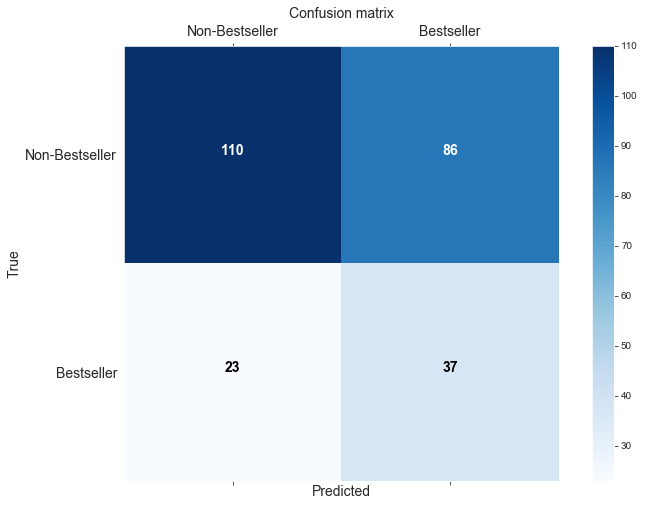

In [102]:
cm = confusion_matrix(pd.DataFrame(y_test)['NYT_Bestseller'],y_hat_test_2)
classes = ['Non-Bestseller','Bestseller']
print(cm)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm,cmap=plt.cm.Blues)
plt.title('Confusion matrix',fontdict={'size':14})
fig.colorbar(cax)
sns.axes_style({'text.color': 'red'})
ax.set_xticklabels([''] + classes,fontdict={'size':14})
ax.set_yticklabels([''] + classes,fontdict={'size':14})
plt.xlabel('Predicted',fontdict={'size':14})
plt.ylabel('True',fontdict={'size':14})
plt.grid(b=None)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             fontdict={'size':14,'weight':'heavy'},
             color="white" if cm[i, j] > thresh else "black")
plt.show()

# Model 2: KNN

In [103]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(x_train_res, y_train_res)
y_hat_test_KNN = model_KNN.predict(X_test)
y_hat_train_KNN = model_KNN.predict(x_train_res)

In [104]:
print_metrics(y_train_res,y_hat_train_KNN)
print("---------")
print_metrics(y_test, y_hat_test_KNN)

Precision Score: 0.7303128371089536
Recall Score: 0.9273972602739726
Accuracy Score: 0.7924657534246575
F1 Score: 0.8171394085697042
---------
Precision Score: 0.23684210526315788
Recall Score: 0.45
Accuracy Score: 0.53125
F1 Score: 0.3103448275862069


In [105]:
params = {'n_neighbors': [1,3,5,7,9,11,13,15],
          'weights':['uniform','distance'],
          'metric':['euclidean','manhattan']}
gs=GridSearchCV(KNeighborsClassifier(),params,n_jobs=-1, verbose=1, cv=3)
gs_results = gs.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.7s finished


In [106]:
print(gs_results.best_params_)
print(gs_results.best_score_)

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
0.6911045943304007


In [107]:
model_KNN = KNeighborsClassifier(metric='euclidean', n_neighbors=15,weights='uniform')
model_KNN.fit(X_train, y_train)
y_hat_test_KNN2 = model_KNN.predict(X_test)
y_hat_train_KNN2 = model_KNN.predict(X_train)

In [108]:
print_metrics(y_hat_test_KNN2,y_test)


Precision Score: 0.06666666666666667
Recall Score: 0.18181818181818182
Accuracy Score: 0.7109375
F1 Score: 0.0975609756097561


[[110  86]
 [ 23  37]]


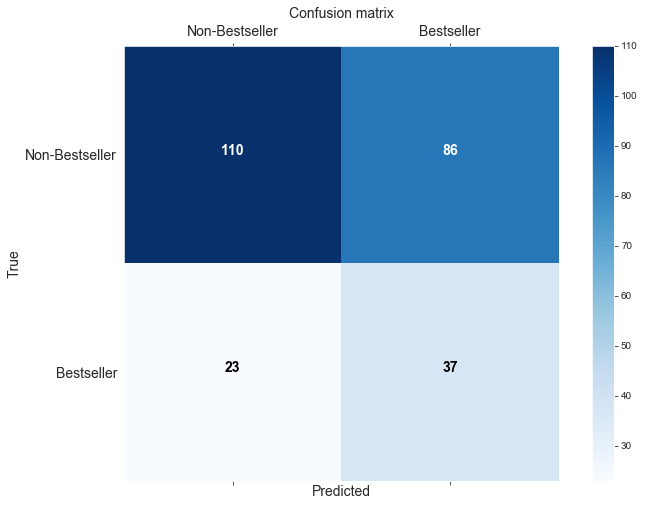

In [109]:
m = confusion_matrix(y_test,y_hat_test_KNN2)
classes = ['Non-Bestseller','Bestseller']
print(cm)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm,cmap=plt.cm.Blues)
plt.title('Confusion matrix',fontdict={'size':14})
fig.colorbar(cax)
sns.axes_style({'text.color': 'red'})
ax.set_xticklabels([''] + classes,fontdict={'size':14})
ax.set_yticklabels([''] + classes,fontdict={'size':14})
plt.xlabel('Predicted',fontdict={'size':14})
plt.ylabel('True',fontdict={'size':14})
plt.grid(b=None)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             fontdict={'size':14,'weight':'heavy'},
             color="white" if cm[i, j] > thresh else "black")
plt.show()

# Model 3: Decision Tree

In [110]:
DT_clf= DecisionTreeClassifier()
DT_clf.fit(x_train_res,y_train_res) 
y_hat_test_DT = DT_clf.predict(X_test)

In [111]:
DT_clf.feature_importances_

array([0.11993954, 0.26271196, 0.16156508, 0.01466145, 0.02323102,
       0.0210903 , 0.01366397, 0.00254863, 0.00087043, 0.0197303 ,
       0.01191312, 0.00332563, 0.01507246, 0.00182648, 0.02972736,
       0.01549064, 0.00872661, 0.02823604, 0.01543647, 0.00100479,
       0.01301657, 0.02085259, 0.00241553, 0.00249269, 0.        ,
       0.        , 0.        , 0.00311319, 0.02996635, 0.        ,
       0.0311531 , 0.01107389, 0.00511343, 0.        , 0.01029618,
       0.02190759, 0.01619537, 0.04387263, 0.00437836, 0.        ,
       0.00331996, 0.00596651, 0.00409377])

In [112]:
DT_feature_importances = pd.DataFrame(DT_clf.feature_importances_,
                                   index = x_train_res.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
DT_feature_importances

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [268]:
dropfeats = DT_feature_importances[DT_feature_importances['importance'] == 0]

In [269]:
dropfeats

,importance
genre_Sports,0.0
genre_Travel,0.0
genre_Womens,0.0
genre_Psychology,0.0
genre_Politics,0.0
genre_Writing,0.0
genre_Parenting,0.0
genre_Cultural,0.0
genre_Media,0.0
genre_Leadership,0.0


In [315]:
print_metrics(y_test,y_hat_test_DT) # pretty low accuracy score with default params, let's try Random search!
# random search will try a bunch of random values within the range we gave for each parameter
# after that, we can use grid search around the values random search says to use!

Precision Score: 0.42105263157894735
Recall Score: 0.5714285714285714
Accuracy Score: 0.66796875
F1 Score: 0.48484848484848486


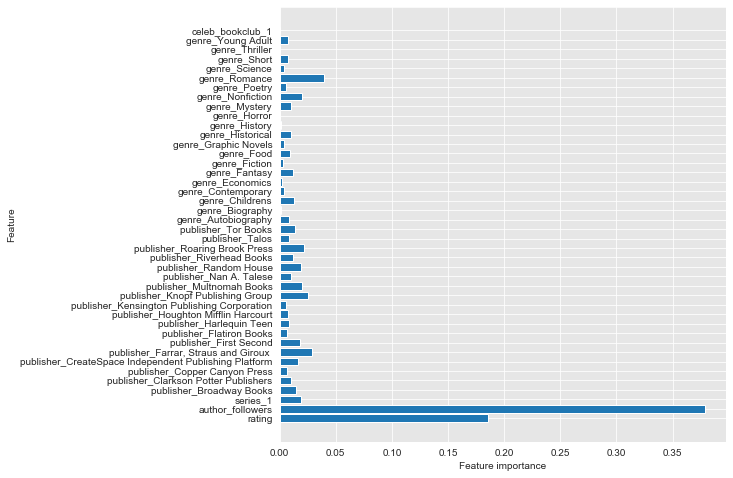

In [316]:
import numpy as np
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(DT_clf.fit(x_train_res, y_train_res))

# Model 4: Random Forest

In [113]:
forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(x_train_res, y_train_res)
y_hat_test = forest_clf.predict(X_test)

In [114]:
forest_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [115]:
y_hat_forest = forest_clf.predict(X_test)
accuracy_score(y_hat_test,y_test)

0.70703125

In [116]:
params = {"n_estimators": [40,45,50],
                "max_depth": [20,21,22],
                 "max_features": [12,14,16],
                 "min_samples_leaf": [5,6,7],
                 "min_samples_split": [350,360,370],
                }

forest_grid_search = GridSearchCV(RandomForestClassifier(), params, cv=3)
forest_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [117]:
forest_grid_search.best_params_

{'max_depth': 22,
 'max_features': 14,
 'min_samples_leaf': 5,
 'min_samples_split': 350,
 'n_estimators': 45}

In [322]:
forest_clf_2 = forest_grid_search.best_estimator_

In [323]:
forest_clf_2.fit(x_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=350,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [324]:
y_hat_forest2 = forest_clf_2.predict(X_test)

In [325]:
print_metrics(y_test,y_hat_test)

Precision Score: 0.4606741573033708
Recall Score: 0.5857142857142857
Accuracy Score: 0.69921875
F1 Score: 0.5157232704402516


In [326]:
feature_importances = pd.DataFrame(forest_clf_2.feature_importances_,
                                   index = X.columns,
                                columns=['importance']).sort_values('importance', ascending=False)

In [327]:
feature_importances

,importance
author_followers,0.396051
genre_Romance,0.116051
publisher_Knopf Publishing Group,0.072806
genre_Graphic Novels,0.065883
series_1,0.053776
publisher_Riverhead Books,0.053086
"publisher_Farrar, Straus and Giroux",0.041774
publisher_Talos,0.026752
publisher_Random House,0.021220
rating,0.020998


In [ ]:
plot_feature_importance(forest_clf_2,X_train,n=63)

# SVM

In [118]:
from sklearn.svm import SVC  

svclassifier = SVC(kernel='rbf', C=1000)  
svc_mod = svclassifier.fit(x_train_res, y_train_res) 
y_pred = svclassifier.predict(X_test)

In [119]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[115  81]
 [ 18  42]]
              precision    recall  f1-score   support

           0       0.86      0.59      0.70       196
           1       0.34      0.70      0.46        60

    accuracy                           0.61       256
   macro avg       0.60      0.64      0.58       256
weighted avg       0.74      0.61      0.64       256

The accuracy score is 0.61328125


In [120]:
print_metrics(y_test,y_pred)

Precision Score: 0.34146341463414637
Recall Score: 0.7
Accuracy Score: 0.61328125
F1 Score: 0.4590163934426229


In [121]:
#ROC/AUC
#First calculate the probability scores of each of the datapoints:
y_test_score = svc_mod.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_test_score)

y_train_score = svc_mod.decision_function(x_train_res)

train_fpr, train_tpr, thresholds = roc_curve(y_train_res, y_train_score)

AUC: 0.678656462585034


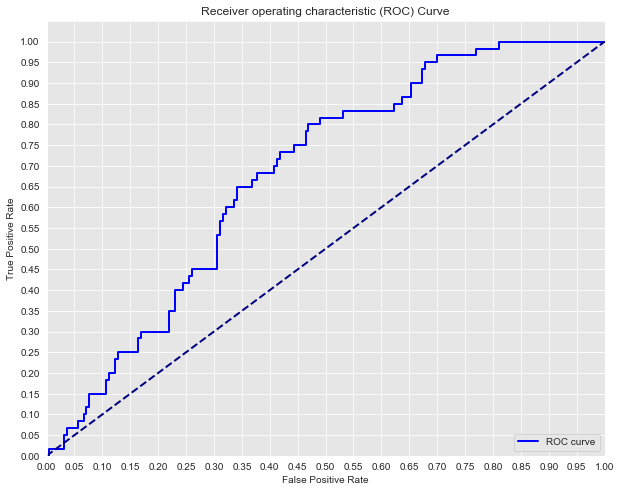

In [122]:
plot_AUC_ROC(y_test_score,fpr,tpr)

# XG Boost

In [123]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(x_train_res)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train_res, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

ValueError: feature_names mismatch: ['rating', 'author_followers', 'pages', 'series_1', 'publisher_Broadway Books', 'publisher_Clarkson Potter Publishers', 'publisher_Copper Canyon Press', 'publisher_CreateSpace Independent Publishing Platform', 'publisher_Farrar, Straus and Giroux ', 'publisher_First Second', 'publisher_Flatiron Books', 'publisher_Harlequin Teen', 'publisher_Houghton Mifflin Harcourt', 'publisher_Kensington Publishing Corporation', 'publisher_Knopf Publishing Group', 'publisher_Multnomah Books', 'publisher_Nan A. Talese', 'publisher_Random House', 'publisher_Riverhead Books', 'publisher_Roaring Brook Press', 'publisher_Talos', 'publisher_Tor Books', 'genre_Autobiography', 'genre_Biography', 'genre_Childrens', 'genre_Contemporary', 'genre_Economics', 'genre_Fantasy', 'genre_Fiction', 'genre_Food', 'genre_Graphic Novels', 'genre_Historical', 'genre_History', 'genre_Horror', 'genre_Mystery', 'genre_Nonfiction', 'genre_Poetry', 'genre_Romance', 'genre_Science', 'genre_Short', 'genre_Thriller', 'genre_Young Adult', 'celeb_bookclub_1'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42']
expected genre_Food, author_followers, genre_Historical, publisher_Farrar, Straus and Giroux , publisher_Houghton Mifflin Harcourt, pages, publisher_Multnomah Books, publisher_Random House, genre_History, genre_Horror, genre_Fiction, genre_Short, publisher_Talos, genre_Childrens, publisher_Riverhead Books, publisher_Broadway Books, publisher_Roaring Brook Press, publisher_Kensington Publishing Corporation, genre_Autobiography, genre_Romance, publisher_Harlequin Teen, genre_Contemporary, publisher_Knopf Publishing Group, publisher_Clarkson Potter Publishers, genre_Science, celeb_bookclub_1, genre_Fantasy, genre_Biography, publisher_Tor Books, genre_Young Adult, publisher_First Second, genre_Poetry, genre_Thriller, genre_Economics, series_1, genre_Mystery, publisher_Flatiron Books, genre_Nonfiction, publisher_CreateSpace Independent Publishing Platform, genre_Graphic Novels, publisher_Nan A. Talese, publisher_Copper Canyon Press, rating in input data
training data did not have the following fields: f10, f5, f31, f28, f7, f39, f13, f14, f16, f15, f42, f2, f33, f23, f8, f18, f0, f24, f19, f4, f6, f25, f29, f11, f26, f41, f3, f27, f38, f20, f30, f1, f35, f9, f36, f17, f34, f22, f21, f40, f32, f12, f37

In [125]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [126]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(x_train_res, y_train_res)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(x_train_res)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train_res, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.5


ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42'] ['rating', 'author_followers', 'pages', 'series_1', 'publisher_Broadway Books', 'publisher_Clarkson Potter Publishers', 'publisher_Copper Canyon Press', 'publisher_CreateSpace Independent Publishing Platform', 'publisher_Farrar, Straus and Giroux ', 'publisher_First Second', 'publisher_Flatiron Books', 'publisher_Harlequin Teen', 'publisher_Houghton Mifflin Harcourt', 'publisher_Kensington Publishing Corporation', 'publisher_Knopf Publishing Group', 'publisher_Multnomah Books', 'publisher_Nan A. Talese', 'publisher_Random House', 'publisher_Riverhead Books', 'publisher_Roaring Brook Press', 'publisher_Talos', 'publisher_Tor Books', 'genre_Autobiography', 'genre_Biography', 'genre_Childrens', 'genre_Contemporary', 'genre_Economics', 'genre_Fantasy', 'genre_Fiction', 'genre_Food', 'genre_Graphic Novels', 'genre_Historical', 'genre_History', 'genre_Horror', 'genre_Mystery', 'genre_Nonfiction', 'genre_Poetry', 'genre_Romance', 'genre_Science', 'genre_Short', 'genre_Thriller', 'genre_Young Adult', 'celeb_bookclub_1']
expected f10, f5, f31, f28, f7, f39, f13, f14, f16, f15, f42, f2, f33, f23, f8, f18, f0, f24, f19, f4, f6, f25, f29, f11, f26, f41, f3, f27, f38, f20, f30, f1, f35, f9, f36, f17, f34, f22, f21, f40, f32, f12, f37 in input data
training data did not have the following fields: genre_Food, author_followers, genre_Historical, publisher_Farrar, Straus and Giroux , publisher_Houghton Mifflin Harcourt, pages, publisher_Multnomah Books, publisher_Random House, genre_History, genre_Horror, genre_Fiction, genre_Short, publisher_Talos, genre_Childrens, publisher_Riverhead Books, publisher_Broadway Books, publisher_Roaring Brook Press, publisher_Kensington Publishing Corporation, genre_Autobiography, genre_Romance, publisher_Harlequin Teen, genre_Contemporary, publisher_Knopf Publishing Group, publisher_Clarkson Potter Publishers, genre_Science, celeb_bookclub_1, genre_Fantasy, genre_Biography, publisher_Tor Books, genre_Young Adult, publisher_First Second, genre_Poetry, genre_Thriller, genre_Economics, series_1, genre_Mystery, publisher_Flatiron Books, genre_Nonfiction, publisher_CreateSpace Independent Publishing Platform, genre_Graphic Novels, publisher_Nan A. Talese, publisher_Copper Canyon Press, rating

In [ ]:
print_metrics(y_test, test_preds)